In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('/Users/akashzamnani/datasets/spotify-tracks.csv')

In [5]:
dff = pd.read_csv('/Users/akashzamnani/Downloads/Euros24.csv.csv')

In [94]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [95]:
df.shape

(114000, 21)

In [96]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [97]:
shuffled_df = df.sample(n=len(df))

In [98]:
df = df.reset_index()

In [99]:
df.head(5)

,index,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [100]:
df = df.drop(['track_id'], axis= 1)

In [101]:
df.isnull().sum()

index               0
Unnamed: 0          0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [102]:
df = df.dropna()

In [103]:
df.dtypes

index                 int64
Unnamed: 0            int64
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [104]:
popular_genre=df.groupby('track_genre').size().unique
popular_genre

<bound method Series.unique of track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Length: 114, dtype: int64>

In [105]:
popular_artists = df.groupby('artists').size().unique


In [106]:
df['artists'].unique

<bound method Series.unique of 0                    Gen Hoshino
1                   Ben Woodward
2         Ingrid Michaelson;ZAYN
3                   Kina Grannis
4               Chord Overstreet
                   ...          
113995             Rainy Lullaby
113996             Rainy Lullaby
113997             Cesária Evora
113998          Michael W. Smith
113999             Cesária Evora
Name: artists, Length: 113999, dtype: object>

<Axes: title={'center': 'Correlation heatmap'}>

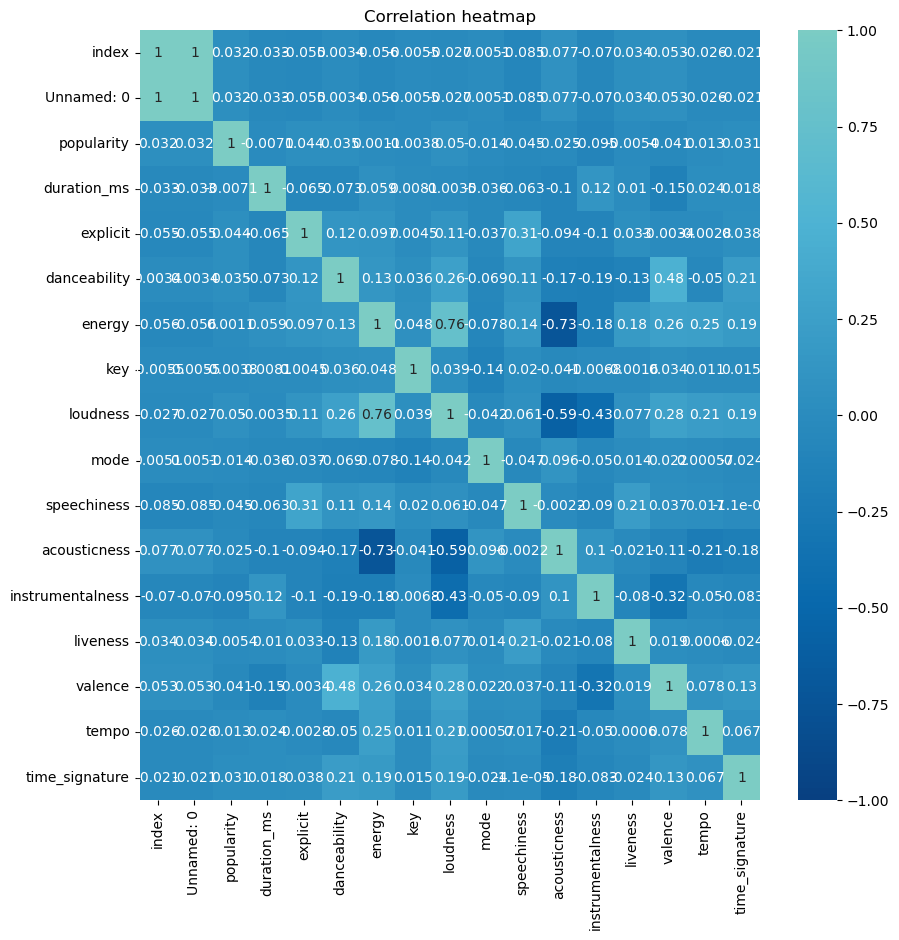

In [107]:
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(df.drop(['artists','album_name','track_name','track_genre'],axis=1).corr(),annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

In [108]:
df_use = df[['track_genre','duration_ms','danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','popularity']]

In [109]:
df_use.head()

,track_genre,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,acoustic,230666,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,73
1,acoustic,149610,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,55
2,acoustic,210826,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,57
3,acoustic,201933,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,71
4,acoustic,198853,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,82


In [110]:
df_shuflled = df_use.sample(len(df_use))

In [111]:
df_shuflled.head()

,track_genre,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
1686,afrobeat,254106,0.605,0.740,-7.875,0,0.0385,0.077200,0.911000,0.1940,0.7450,102.605,18
7387,bluegrass,224026,0.603,0.316,-10.803,0,0.0293,0.842000,0.000672,0.0977,0.6660,126.802,25
73765,minimal-techno,432093,0.745,0.964,-5.607,1,0.0526,0.000028,0.879000,0.1110,0.0361,129.002,38
59814,iranian,197774,0.568,0.942,-4.932,1,0.0749,0.001160,0.000015,0.0904,0.5090,157.086,0
64476,jazz,175400,0.383,0.136,-16.138,1,0.0396,0.851000,0.000000,0.1070,0.4220,71.126,0


In [112]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [123]:
track_genre = df['track_genre'].unique()

In [124]:
track_genre

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [147]:
df_shuflled['track_genre'] = encoder.fit_transform(df_shuflled['track_genre'])

In [148]:
df_shuflled

,track_genre,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
1686,1,254106,0.605,0.740,-7.875,0,0.0385,0.077200,0.911000,0.1940,0.7450,102.605,18
7387,7,224026,0.603,0.316,-10.803,0,0.0293,0.842000,0.000672,0.0977,0.6660,126.802,25
73765,73,432093,0.745,0.964,-5.607,1,0.0526,0.000028,0.879000,0.1110,0.0361,129.002,38
59814,59,197774,0.568,0.942,-4.932,1,0.0749,0.001160,0.000015,0.0904,0.5090,157.086,0
64476,64,175400,0.383,0.136,-16.138,1,0.0396,0.851000,0.000000,0.1070,0.4220,71.126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36871,36,403026,0.541,0.849,-5.024,1,0.3510,0.137000,0.000012,0.3650,0.6380,76.314,32
22484,22,329426,0.446,0.939,-6.032,1,0.0771,0.000021,0.003430,0.3540,0.3150,140.049,24
3956,3,132746,0.777,0.721,-6.951,1,0.0710,0.476000,0.051200,0.2700,0.8800,106.956,67
54598,54,174759,0.666,0.751,-7.488,1,0.2450,0.024900,0.000010,0.0928,0.1900,179.966,10


In [149]:
y = df_shuflled['popularity']
x = df_shuflled.drop(['popularity'], axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=29)
scaler = StandardScaler()

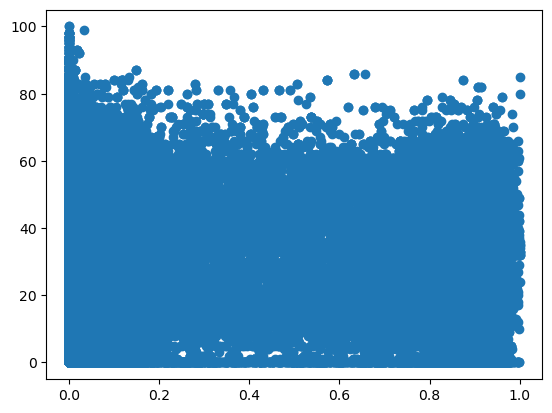

In [159]:
plt.scatter(df_shuflled['instrumentalness'],df_shuflled['popularity'])

In [160]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train.values,y_train.values)

LinearRegression()

In [161]:
model.score

<bound method RegressorMixin.score of LinearRegression()>

In [162]:
model.score(x_train_scaled,y_train)

-0.3553625300173133

In [166]:
y_pred = model.predict(x_test.values)

In [173]:
model.score(y_test.reshape(1,-1),y_pred)

AttributeError: 'Series' object has no attribute 'reshape'